# Practice 9: Convolutional Neural Networks

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**


 [Video Walkthough of Practice9.]



# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

====== This should generate a FutureWaring on Conversion ===== ignore this warning


Using TensorFlow backend.


# Section 1:  Image Filters or Kernels

![alt text](https://i.stack.imgur.com/9Iu89.gif)

We will review how image filters, also known as kernels, are applied to an image.

Review this[ visualization from Victor Powell](http://setosa.io/ev/image-kernels/)





## Task 1: Apply Image Filter

Make a copy of this [CIS 3115 Vision Filter Google sheet](https://docs.google.com/spreadsheets/d/1Ku-6gWUVZcVsmrdL8b1C5RMWwyvzOWXIck07D7XKApM/edit?usp=sharing). 

We will manually apply two filters to a sample image. 

*Note: you do not have to complete the full image,  but do enought to demonstrate that you know how to apply kernels.*



# Section 2: CNN for Kaggle Digit Recognition Challenge

We will apply Convolutional Neural Networks (CNNs) to the Kaggle Digit Challenge.

First, we will read in the digit images from Kaggle.

In [0]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
url_kaggle_train = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/train.csv'
url_kaggle_test = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/test.csv'
  
train_kaggle = pd.read_csv(url_kaggle_train)
# Pull out the labels or output which are saved in first index
y_train_kaggle = train_kaggle.iloc[:,0].values.astype('int32')
# Convert remaining values to floats
X_train_kaggle = (train_kaggle.iloc[:,1:].values).astype('float32')
# Read the kaggle test data which is used for submissions
X_submit_kaggle = (pd.read_csv(url_kaggle_test).values).astype('float32')
#reshape as 28x28 pixel images
X_train_kaggle = X_train_kaggle.reshape(X_train_kaggle.shape[0], 28, 28)
X_submit_kaggle = X_submit_kaggle.reshape(X_submit_kaggle.shape[0], 28, 28)

print ("X_train_kaggle training data shape of 28x28 pixels greyscale: " ,X_train_kaggle.shape)
print ("X_submit_kaggle submission data shape of 28x28 pixels greyscale: : " ,X_submit_kaggle.shape)

X_train_kaggle training data shape of 28x28 pixels greyscale:  (42000, 28, 28)
X_submit_kaggle submission data shape of 28x28 pixels greyscale: :  (28000, 28, 28)


## Set up the data

**Scale Data:** Neural Networks work best with the inputs are between 0 and +1, but the grayscale images have pixel values between 0 and 255. So, each pixel value is divided by 255 to scale it.

**Reformatting: **Above we reformatted the data into 28x28 pixel arrays so we could display it. Now we are converting it back to a single list of 784 pixels. ( 28 x 28 = 784)

**Split the Data:** The training data is split with 90% used for training and 10% used for testing.

**One-Hot Encoding:** A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions.  In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

- For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [0]:

input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

# Normalize the data so values are between 0 and 1 instead of between 0 and 255
X_train_kaggle = X_train_kaggle / 255
X_submit_kaggle = X_submit_kaggle / 255

#reshape for dense-only inputs
train_size = X_train_kaggle.shape[0]
submit_size = X_submit_kaggle.shape[0]
X_train_kaggle = X_train_kaggle.reshape(train_size, 28, 28, 1)
X_submit_kaggle = X_submit_kaggle.reshape(submit_size, 28, 28, 1)

# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train_kaggle, y_train_kaggle, test_size=0.1)

# A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
y_train = np_utils.to_categorical(y_train_num, output_Size)
y_test = np_utils.to_categorical(y_test_num, output_Size)

print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (37800, 28, 28, 1)
X_test submission data shape of 28x28 pixels greyscale: :  (4200, 28, 28, 1)
y_train training data shape of 28x28 pixels greyscale:  (37800, 10)
y_test submission data shape of 28x28 pixels greyscale: :  (4200, 10)


## Task 2: CNN Layers

For an overview of CNNs, see [MIT 6.S191: Convolutional Neural Networks](https://youtu.be/H-HVZJ7kGI0?t=1132). While the entire video is good, the key description of CNN layers start at 19:00.

We will use the following Keras pre-built layers to build our CNN.

- **Conv2D**(16, (3, 3), activation='relu')
 - 16 filters, each one 3x3 pixels with default stride of 1
- **MaxPooling2D**(pool_size=(2, 2))
 - 2x2 max pooling filter with default stride of 2
- **Dropout**(0.25)
 - Randomly ignore 25% of the weights
- **Flatten**()
 - Convert a 2D layer into a 1D layer
- **Dense**(32, activation='relu')
 - Standard fully connected layer we have used before

One possibly configuration would be:

```
NN = Sequential()
NN.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
NN.add(Conv2D(8, (3, 3), activation='relu'))
NN.add(MaxPooling2D(pool_size=(2, 2)))
NN.add(Conv2D(16, (3, 3), activation='relu'))
NN.add(Flatten())
NN.add(Dense(32, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))
```

Describe what changes to the CNN layers you will make. Options include:

1.   Adding more or less filters in in Conv2D layer. The first parameter is the number of filters at that level.
2.   Add more Conv2D layers. It is common to stack two to four layers together.
3.   Consider trying larger or smaller filters. While 3x3 pixel filters are common, filters range from 1x1 to 7x7.
4.   Try more MaxPooling2D layers
5.   Add some DropOut layers to combat over fitting


*Note: You should not change the input or output layers, they are fixed by our problem definition*


In [0]:
# Set up the Neural Network
input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

NN = Sequential()
NN.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
NN.add(Conv2D(8, (3, 3), activation='relu'))
NN.add(MaxPooling2D(pool_size=(2, 2)))
#NN.add(Dropout(0.25))
NN.add(Conv2D(16, (3, 3), activation='relu'))
NN.add(Flatten())
NN.add(Dense(32, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))
print ("Neural Network Model created")
NN.summary()

# Compile neural network model
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Neural Network Model created
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                51232     
_________________________________________

In [0]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=2, 
                                            factor=0.5,                                            
                                            min_lr=0.000001)

early_stops = EarlyStopping(monitor='val_loss', 
                            min_delta=0, 
                            patience=20, 
                            verbose=2, 
                            mode='auto')

checkpointer = ModelCheckpoint(filepath = 'cis3115_MNIST.{epoch:02d}-{accuracy:.6f}.hdf5',
                               verbose=2,
                               save_best_only=True, 
                               save_weights_only = True)


## Train the Neural Network

This will run all 37800 training images through the network and update the weights. 

- epochs = 10 means to run the training 10 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
### Note: This is a large data set and training will be slow. This might take a couple of minutes to run. 

This is why we are only using 10 epochs initially

In [0]:
# Fit model on training data for network with dense input layer

history = NN.fit(X_train, y_train,
          epochs=10,
          verbose=1,
          callbacks=[learning_rate_reduction, early_stops],
          validation_data=(X_test, y_test))



Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 29s 779us/step - loss: 0.2349 - acc: 0.9275 - val_loss: 0.0946 - val_acc: 0.9702
Epoch 2/10
37800/37800 [==============================] - 29s 756us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0912 - val_acc: 0.9667
Epoch 3/10
37800/37800 [==============================] - 29s 758us/step - loss: 0.0553 - acc: 0.9824 - val_loss: 0.0719 - val_acc: 0.9786
Epoch 4/10
37800/37800 [==============================] - 29s 769us/step - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0598 - val_acc: 0.9819
Epoch 5/10
37800/37800 [==============================] - 29s 764us/step - loss: 0.0350 - acc: 0.9887 - val_loss: 0.0561 - val_acc: 0.9845
Epoch 6/10
37800/37800 [==============================] - 29s 759us/step - loss: 0.0285 - acc: 0.9912 - val_loss: 0.0639 - val_acc: 0.9817
Epoch 7/10
37800/37800 [==============================] - 29s 754us/s

## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

Running final scoring on test data
4200/4200 [==============================] - 1s 292us/step
The accuracy for this model is  0.98


(0, 1)

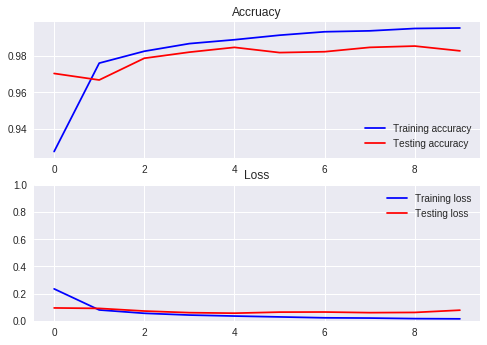

In [0]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = NN.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)
plt.ylim(0,1)

## Create the Submission for Kaggle

The following code generates a file named CIS3115_Submission.csv which you need to download to your local PC and then upload to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit).



In [0]:
predictions = NN.predict_classes(X_submit_kaggle, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})

submissions.to_csv("CIS3115_Submission.csv", index=False, header=True)

## Kaggle Submission

Run the code above after training the network above. It will go through the 28,000 submission images and generate an prediction for each. These are saved in a file named "CIS3115_Submission.csv"

**Colab Users: ** The submission file is stored in the Colab files tied to this colab notebook in the Google cloud. 
1. Open the left-side menu by clicking on the > icon near the top-left
2. Select the file tab
3. Hit the Refresh button and the file should be displayed in the list
4. Right-click on the file and choose "Download" and save it to a folder on your PC.

**Juptyter Notebook Users: ** The submission file will be stored in the same folder as your Jupyter notebook file.

Once you have the file, return to  the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and select the Submit button. Follow the steps to upload your submission and see how it scores.

Record your initial submission score here: _ _ _ _ _ _ _ _ _ _ _ _


## Task 3: Report Best Score

Try finding a good mix of the following:

1. Number and size of convolution layers

1. Number and rate of dropout layers

1. Learning Rate reduction

Submit your best network to the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and compare it to your original score

Base Kaggle scores here:  98.8%

Best Kaggle scores here:  _ _ _ _ _ _ _ _ _ _



# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.